# Prison construction and Black male incarceration
### Scott Cunningham

This notebook reproduces the weights from the last chapter of the book "Causal Inference: The Mixtape" by Scott Cunningham that examined prison construction and black male incarceration in the state of Texas. The study data is contained in the file `../data/texas.csv`.

In [1]:
import pandas as pd
from pysyncon import Dataprep, Synth

Firstly we prepare the study data using a `Dataprep` object that describes all the details needed to define the synthetic control study. This works similarly to the `dataprep` method in the `R` package `synth`.

Next, we supply the `Dataprep` object to a `Synth` object. The optimisation scheme we use is [BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) and the starting point for the optimisation is `ols` i.e. the coordinates of the points are obtained by fitting an ordinary-least-squares estimate. (Unlike the `R` package `synth` which performs four different runs under the hood (two different starting points and two different optimisation schemes), in this package only one optimisation is run per `fit`). Note that the weights obtained by the synthetic control method is often highly sensitive to the chosen optimisation scheme and starting point.

In [2]:
df = pd.read_csv("../data/texas.csv")

dataprep = Dataprep(
    foo=df,
    predictors=["income", "ur", "poverty"],
    predictors_op="mean",
    time_predictors_prior=range(1985, 1994),
    special_predictors=[
        ("bmprison", [1988], "mean"),
        ("bmprison", [1990], "mean"),
        ("bmprison", [1991], "mean"),
        ("bmprison", [1992], "mean"),
        ("alcohol", [1990], "mean"),
        ("aidscapita", [1990], "mean"),
        ("aidscapita", [1991], "mean"),
        ("black", [1990], "mean"),
        ("black", [1991], "mean"),
        ("black", [1992], "mean"),
        ("perc1519", [1990], "mean"),
    ],
    dependent="bmprison",
    unit_variable="state",
    time_variable="year",
    treatment_identifier="Texas",
    controls_identifier=[
        "Alabama",
        "Alaska",
        "Arizona",
        "Arkansas",
        "California",
        "Colorado",
        "Connecticut",
        "Delaware",
        "District of Columbia",
        "Florida",
        "Georgia",
        "Hawaii",
        "Idaho",
        "Illinois",
        "Indiana",
        "Iowa",
        "Kansas",
        "Kentucky",
        "Louisiana",
        "Maine",
        "Maryland",
        "Massachusetts",
        "Michigan",
        "Minnesota",
        "Mississippi",
        "Missouri",
        "Montana",
        "Nebraska",
        "Nevada",
        "New Hampshire",
        "New Jersey",
        "New Mexico",
        "New York",
        "North Carolina",
        "North Dakota",
        "Ohio",
        "Oklahoma",
        "Oregon",
        "Pennsylvania",
        "Rhode Island",
        "South Carolina",
        "South Dakota",
        "Tennessee",
        "Utah",
        "Vermont",
        "Virginia",
        "Washington",
        "West Virginia",
        "Wisconsin",
        "Wyoming",
    ],
    time_optimize_ssr=range(1985, 1994),
)

synth = Synth()
synth.fit(dataprep=dataprep, optim_method="BFGS", optim_initial="ols")

In [3]:
synth.weights(threshold=0.01)

California    0.408
Florida       0.111
Illinois      0.360
Louisiana     0.122
Name: weights, dtype: float64

The synthetic control obtained from the optimisation is: $$\text{Synthetic Control} = 0.408 \times \text{California} + 0.111 \times \text{Florida} + 0.360 \times \text{Illinois} + 0.122 \times \text{Louisiana}.$$

The `path_plot` method shows the path of the treated unit and the synthetic control over time.

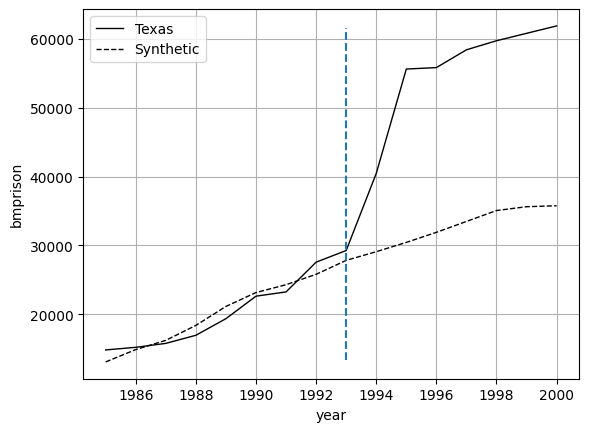

In [4]:
synth.path_plot(time_period=range(1985, 2001), treatment_time=1993)

The `gaps_plot` method shows the gaps (the difference between the treated unit and the synthetic control) over time.

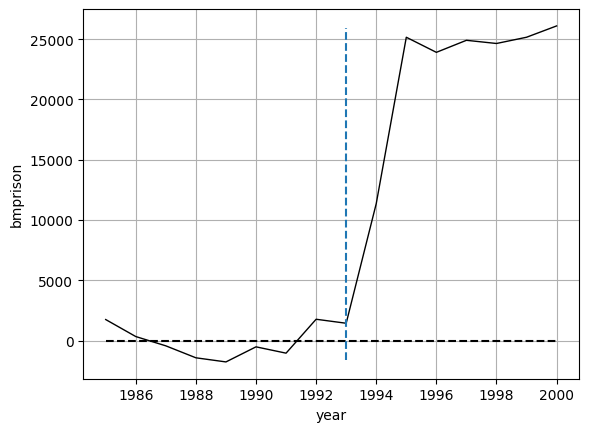

In [5]:
synth.gaps_plot(time_period=range(1985, 2001), treatment_time=1993)

In [6]:
synth.summary()

V    treated  synthetic  sample mean
income                0.000  16485.778  19001.457    17480.102
ur                    0.000      7.399      7.312        6.167
poverty               0.000     17.222     15.166       13.492
special.1.bmprison    0.041  16956.000  18390.115     4872.160
special.2.bmprison    0.041  22634.000  23158.777     6098.230
special.3.bmprison    0.056  23249.000  24298.438     6560.480
special.4.bmprison    0.145  27568.000  25803.951     6971.660
special.5.alcohol     0.000      2.470      2.713        2.504
special.6.aidscapita  0.015     13.590     15.025        8.763
special.7.aidscapita  0.016     14.835     17.275       10.126
special.8.black       0.172     16.155     15.990       11.288
special.9.black       0.443     16.300     16.178       11.418
special.10.black      0.070     16.460     16.385       11.566
special.11.perc1519   0.000      7.703      7.028        7.193